In [58]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

In [59]:
df = pd.read_csv("../APIs/Python API/NBA_All_Star_cleaned.csv")
df = pd.DataFrame(df)
df.head()

,Source,Title,Description
0,espn,nba emphasizing '82-game' mindset to players,nba executive joe dumars said the league is em...
1,espn,"four up, four down: the nbarank futures of thi...",our nba experts break down the future for eigh...
2,time,magic johnson has declined multiple nba owners...,magic johnson's love for his los angeles laker...
3,bbc news,idris elba: actors in video games like phantom...,"idris elba, who stars in cyberpunk 2077: phant..."
4,espn,"nbarank 50-11: wemby, trae and beal hit the to...",nbarank is back for its 13th season counting d...


In [60]:
print(df.shape)
print(df.columns)

(100, 3)
Index(['Source', 'Title', 'Description'], dtype='object')


In [61]:
# looking at title features
source_tags = {
    'espn': 1, 'time': 2, 'bbc news': 3, 'xatakacom': 4, 'bleacher report': 5,
    'marketwatch': 6, 'stereogum': 7, 'huffpost': 8, 'el mundo': 9, 'crackedcom': 10,
    'deadspin': 11, 'sports illustrated': 12, 'egotasticsportscom': 13,
    'fox sports': 14, 'rolling stone': 15, 'tmz': 16, 'forbes': 17, 'indiewire': 18
}

newsTitle = []
y = []

for i in range(df.shape[0]):
    keep="abcdefghijklmnopqrstuvwxyz "
    replace=".,!;"
    tmp=""
    for char in df['Title'][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    
    tmp=" ".join(tmp.split())
    newsTitle.append(tmp)

    source = df['Source'][i].lower()
    if source in source_tags:
        y.append(source_tags[source])
    

    if(i<3):
        print(i)
        print(df['Title'][i].replace("<br />",""),'\n')
        print(tmp)
        print(df['Source'][i],y[i])

0
nba emphasizing '82-game' mindset to players 

nba emphasizing game mindset to players
espn 1
1
four up, four down: the nbarank futures of this year's biggest risers and fallers 

four up four down the nbarank futures of this years biggest risers and fallers
espn 1
2
magic johnson has declined multiple nba ownership chances the new york knicks would interest him 

magic johnson has declined multiple nba ownership chances the new york knicks would interest him
time 2


In [62]:
y = np.array(y)

In [63]:
print(len(newsTitle), len(y))

100 100


In [64]:
def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(newsTitle,MAX_FEATURES=10000)

In [65]:
print(x.shape, y.shape)

(100, 531) (100,)


In [66]:
# swap keys & values
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [67]:
#check pairs
print(list(vocab1.keys())[0:10])
print(list(vocab1.values())[0:10])

[324, 139, 167, 311, 357, 326, 166, 527, 26, 398]
['nba', 'emphasizing', 'game', 'mindset', 'players', 'nbarank', 'futures', 'years', 'biggest', 'risers']


In [68]:
print(x.sum(axis=0))

[ 1.  1.  1.  1.  1.  1.  4.  1.  1.  1.  1. 12.  1.  1.  2.  1.  1.  1.
  1.  1.  2.  1.  1.  2.  2.  1.  2.  1.  1.  7.  1.  1.  1.  2.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 14.  1.  1.  2.  3.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  5.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  4.  1.  1.  1.  1.  1.  1.  1.  1.  1.  7.  1.
  1.  1.  1.  1.  1.  2. 16.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  6.  1.  1.
  2.  1.  1.  1.  2.  1.  1.  1.  5.  1.  1.  1.  1.  1.  1.  1.  3.  1.
  1.  1.  2.  1.  1.  3.  4.  1.  1.  1.  5.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  5.  1.  1.  1.  3.
  3.  1.  1.  1.  1.  1.  2.  1.  1.  1.  2.  5.  1.  2.  1.  1.  1.  1.
  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  4.  1.  1.  1.
  1.  1.  1.  1.  1.  6.  1.  1.  1.  2.  2.  1.  1

In [69]:
# reorder columns from high to low freq
df2 = pd.DataFrame(x)
s = df2.sum(axis=0)
df2 = df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   324  403  479  278  96   46   11   441  88   29   ...  190  188  187  186  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   185  184  183  182  181  265  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 531 columns]


In [70]:
# remap dictionary
i1=0
vocab2={}
for i2 in list(df2.columns):
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

# checking pairs
print(vocab2[0], vocab1[324]) # should be "nba"
print(vocab2[1], vocab1[403]) # should be "rumors"

nba nba
rumors rumors


In [71]:
# rename cols
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x = df2.to_numpy()

   0    1    2    3    4    5    6    7    8    9    ...  521  522  523  524  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   525  526  527  528  529  530  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 531 columns]
0      37.0
1      19.0
2      18.0
3      17.0
4      16.0
       ... 
526     1.0
527     1.0
528     1.0
529     1.0
530     1.0
Length: 531, dtype: float64


In [72]:
# splitting data
N = x.shape[0]
l = [*range(N)]     
cut = int(0.8 * N) 
random.shuffle(l) 
train_index = l[:cut] 
test_index = l[cut:] 

print(train_index[0:10])
print(test_index[0:10])

[64, 46, 14, 63, 93, 43, 23, 0, 28, 8]
[73, 79, 78, 75, 21, 32, 26, 35, 4, 66]


In [73]:
# training function
def train_MNB_model(X, Y, i_print=False):
    if(i_print):
        print(X.shape, Y.shape)
    
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    model = MultinomialNB()

    start = time.process_time()
    model.fit(x_train, y_train)
    time_train = time.process_time() - start

    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train)*100
    acc_test = accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train, acc_test, time_train, time_eval)

    return (acc_train, acc_test, time_train, time_eval)

In [74]:
# test the previous function
print(type(x), type(y))
print(x.shape, y.shape)
(acc_train, acc_test, time_train, time_eval) = train_MNB_model(x, y, i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 531) (100,)
(100, 531) (100,)
95.0 50.0 0.005863999999998981 0.0020620000000022287


In [75]:
 def initialize_array():
    global num_feat, train_acc
    global test_acc, train_time, eval_time
    num_feat = []
    train_acc = []
    test_acc = []
    train_time = []
    eval_time = []

In [76]:
initialize_array()

In [77]:
# make search function
def partial_grid_search(num_runs, min_indx, max_indx):
    for i in range(1, num_runs+1):
        upper_indx = min_indx+i * int((max_indx-min_indx)/num_runs)
        x_tmp = x[:,0:upper_indx]

        (acc_train, acc_test, time_train, time_eval)=train_MNB_model(x_tmp, y, i_print=False)

        if(i%5==0):
            print(i, upper_indx, x_tmp.shape[1], acc_train, acc_test)

        num_feat.append(x_tmp.shape[1])
        train_acc.append(acc_train)
        test_acc.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

In [78]:
partial_grid_search(num_runs=20, min_indx=0, max_indx=40)
partial_grid_search(num_runs=40, min_indx=40, max_indx=80)

5 10 10 57.49999999999999 35.0
10 20 20 63.74999999999999 40.0
15 30 30 65.0 40.0
20 40 40 65.0 40.0
5 45 45 63.74999999999999 40.0
10 50 50 63.74999999999999 40.0
15 55 55 65.0 45.0
20 60 60 63.74999999999999 45.0
25 65 65 66.25 45.0
30 70 70 67.5 45.0
35 75 75 68.75 45.0
40 80 80 70.0 50.0


In [79]:
# save reults
def save_results(path):
    output = np.transpose(np.array([num_feat, train_acc, test_acc, train_time, eval_time]))
    output = pd.DataFrame(output)
    output.to_csv(path+".csv")

In [80]:
# plot results
def plot_results(path):

    plt.plot(num_feat, train_acc, "-or")
    plt.plot(num_feat, test_acc, "-ob")
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy: Train (red) & Test (blue)')
    plt.show()

    plt.plot(num_feat, train_time, "-or")
    plt.plot(num_feat, eval_time, "-ob")
    plt.xlabel("Number of Features")
    plt.ylabel("Runtime: Training Time (red) & Evaluation Time (blue)")
    plt.show()

    plt.plot(num_feat, np.array(train_acc)-np.array(test_acc), "-og")
    plt.xlabel("Number of Features")
    plt.ylabel("Train_Accuracies - Train_Accuracies")
    plt.show()


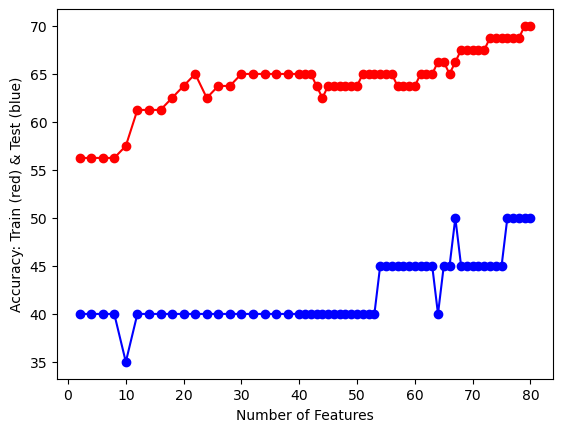

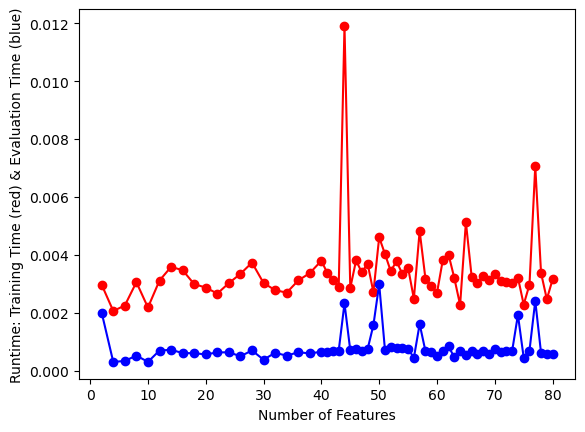

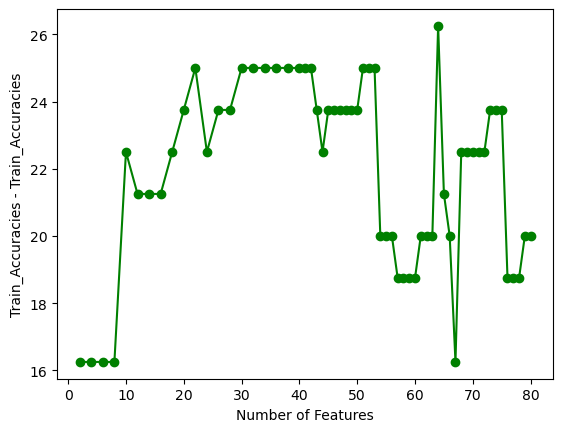

In [81]:
plot_results(path=df)

In [82]:
newsDescription = []
y2 = []

for i in range(df.shape[0]):
    keep="abcdefghijklmnopqrstuvwxyz "
    replace=".,!;"
    tmp=""
    for char in df['Description'][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    
    tmp=" ".join(tmp.split())
    newsDescription.append(tmp)

    source = df['Source'][i].lower()
    if source in source_tags:
        y2.append(source_tags[source])
    

    if(i<3):
        print(i)
        print(df['Description'][i].replace("<br />",""),'\n')
        print(tmp)
        print(df['Source'][i],y2[i])

0
nba executive joe dumars said the league is emphasizing an "82-game" mindset to its players and teams in an effort to curtail load management and increase among its top players over the course of the season 

nba executive joe dumars said the league is emphasizing an game mindset to its players and teams in an effort to curtail load management and increase among its top players over the course of the season
espn 1
1
our nba experts break down the future for eight players who saw their rankings drastically change since last season 

our nba experts break down the future for eight players who saw their rankings drastically change since last season
espn 1
2
magic johnson's love for his los angeles lakers has kept him from considering ownership of any other nba team 

magic johnsons love for his los angeles lakers has kept him from considering ownership of any other nba team
time 2


In [83]:
y2 = np.array(y2)

In [84]:
print(len(newsDescription), len(y2))

100 100


In [85]:
def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x2,vocab01)=vectorize(newsDescription,MAX_FEATURES=10000)

In [86]:
print(x2.shape, y2.shape)

(100, 925) (100,)


In [87]:
# swap keys & values
vocab11 = dict([(value, key) for key, value in vocab01.items()])

In [88]:
#check pairs
print(list(vocab11.keys())[0:10])
print(list(vocab11.values())[0:10])

[554, 274, 422, 234, 708, 458, 254, 322, 527, 616]
['nba', 'executive', 'joe', 'dumars', 'said', 'league', 'emphasizing', 'game', 'mindset', 'players']


In [89]:
print(x2.sum(axis=0))

[ 1.  1.  5.  2.  2.  1.  1.  1.  2.  1.  1.  1.  5.  1.  1.  1.  2.  1.
  1.  1.  1.  3.  1.  1.  1.  1.  2.  1.  1.  1.  1.  8.  1.  1.  1.  1.
  1.  1.  6.  1.  1.  1.  1.  2.  2.  1.  1.  2.  1.  2.  1.  1.  1.  1.
  2.  1.  1.  1.  1.  3.  1.  1.  1.  1.  1.  1.  1.  6.  1.  1.  1.  1.
  1.  2.  1.  2.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.  1.  1.  5.
  1.  1.  2.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1. 14.  1.  3.
  1.  2.  1.  2.  1.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  4.  1.
  3.  1.  1.  5.  1.  1.  1.  1.  1.  5.  1.  1.  2.  1.  3.  1.  1.  4.
  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.
  2.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2. 15.  1.  2.  1.  4.  3.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  1.  1.  1.  1.  2.  1.  1.  1.  2.  4.  1.  1.  1.  1.  1.
  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [90]:
# reorder columns from high to low freq
df21 = pd.DataFrame(x2)
s2 = df21.sum(axis=0)
df21 = df21[s2.sort_values(ascending=False).index[:]]
print(df21.head())

   554  765  187  105  472  344  717  526  626  561  ...  343  346  347  348  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   349  351  352  353  355  462  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 925 columns]


In [91]:
# remap dictionary
i11=0
vocab21={}
for i21 in list(df21.columns):
    vocab21[i11]=vocab11[int(i21)]
    i11+=1

# checking pairs
print(vocab21[0], vocab11[554]) # should be "nba"
print(vocab21[1], vocab11[765]) # should be "star"

nba nba
star star


In [92]:
# rename cols
df21.columns = range(df21.columns.size)
print(df21.head())
print(df21.sum(axis=0))
x2 = df21.to_numpy()

   0    1    2    3    4    5    6    7    8    9    ...  915  916  917  918  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   919  920  921  922  923  924  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 925 columns]
0      34.0
1      15.0
2      15.0
3      14.0
4      14.0
       ... 
920     1.0
921     1.0
922     1.0
923     1.0
924     1.0
Length: 925, dtype: float64


In [93]:
# splitting data
N2 = x2.shape[0]
l2 = [*range(N2)]     
cut2 = int(0.8 * N2) 
random.shuffle(l2) 
train_index2 = l2[:cut] 
test_index2 = l2[cut:] 

print(train_index2[0:10])
print(test_index2[0:10])

[92, 10, 1, 72, 89, 76, 33, 47, 60, 32]
[24, 29, 98, 69, 94, 71, 4, 8, 19, 70]


In [94]:
# test the train_MNB_model function
print(type(x2), type(y2))
print(x2.shape, y2.shape)
(acc_train2, acc_test2, time_train2, time_eval2) = train_MNB_model(x2, y2, i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 925) (100,)
(100, 925) (100,)
98.75 45.0 0.006870000000002818 0.0018670000000007292


In [95]:
 def initialize_array2():
    global num_feat2, train_acc2
    global test_acc2, train_time2, eval_time2
    num_feat2 = []
    train_acc2 = []
    test_acc2 = []
    train_time2 = []
    eval_time2 = []

In [96]:
initialize_array2()

In [97]:
# make search function
def partial_grid_search2(num_runs2, min_indx2, max_indx2):
    for i in range(1, num_runs2+1):
        upper_indx2 = min_indx2+i * int((max_indx2-min_indx2)/num_runs2)
        x_tmp2 = x[:,0:upper_indx2]

        (acc_train2, acc_test2, time_train2, time_eval2)=train_MNB_model(x_tmp2, y2, i_print=False)

        if(i%5==0):
            print(i, upper_indx2, x_tmp2.shape[1], acc_train2, acc_test2)

        num_feat2.append(x_tmp2.shape[1])
        train_acc2.append(acc_train2)
        test_acc2.append(acc_test2)
        train_time2.append(time_train2)
        eval_time2.append(time_eval2)

In [98]:
partial_grid_search2(num_runs2=100, min_indx2=0, max_indx2=400)
partial_grid_search2(num_runs2=20, min_indx2=400, max_indx2=900)

5 20 20 63.74999999999999 40.0
10 40 40 65.0 40.0
15 60 60 63.74999999999999 45.0
20 80 80 70.0 50.0
25 100 100 70.0 50.0
30 120 120 72.5 50.0
35 140 140 73.75 50.0
40 160 160 76.25 45.0
45 180 180 80.0 50.0
50 200 200 80.0 50.0
55 220 220 82.5 45.0
60 240 240 81.25 45.0
65 260 260 82.5 45.0
70 280 280 83.75 45.0
75 300 300 87.5 50.0
80 320 320 90.0 50.0
85 340 340 92.5 45.0
90 360 360 92.5 40.0
95 380 380 92.5 40.0
100 400 400 93.75 45.0
5 525 525 95.0 50.0
10 650 531 95.0 50.0
15 775 531 95.0 50.0
20 900 531 95.0 50.0


In [99]:
# save reults
def save_results2(path):
    output2 = np.transpose(np.array([num_feat2, train_acc2, test_acc2, train_time2, eval_time2]))
    output2 = pd.DataFrame(output2)
    output2.to_csv(path+".csv")

In [100]:
# plot results
def plot_results2(path):

    plt.plot(num_feat2, train_acc2, "-or")
    plt.plot(num_feat2, test_acc2, "-ob")
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy: Train (red) & Test (blue)')
    plt.show()

    plt.plot(num_feat2, train_time2, "-or")
    plt.plot(num_feat2, eval_time2, "-ob")
    plt.xlabel("Number of Features")
    plt.ylabel("Runtime: Training Time (red) & Evaluation Time (blue)")
    plt.show()

    plt.plot(num_feat2, np.array(train_acc2)-np.array(test_acc2), "-og")
    plt.xlabel("Number of Features")
    plt.ylabel("Train_Accuracies - Train_Accuracies")
    plt.show()

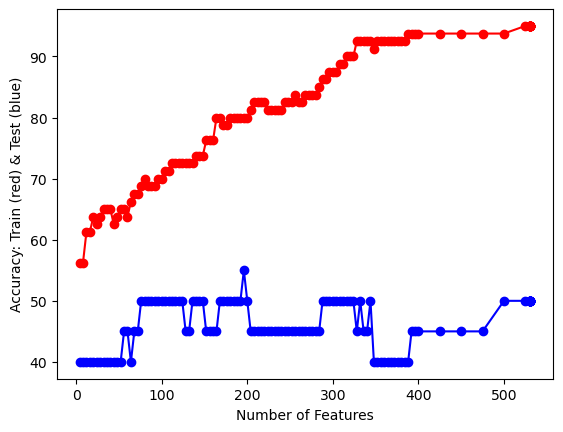

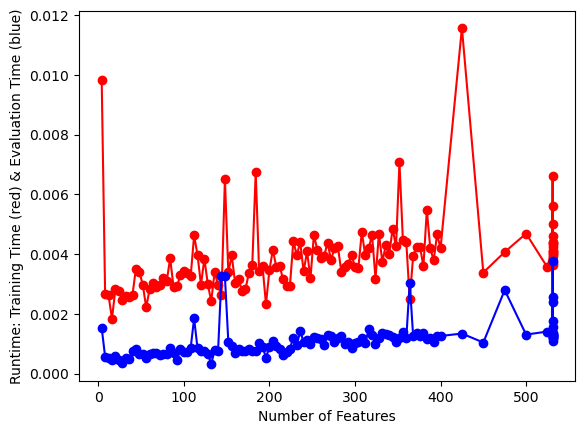

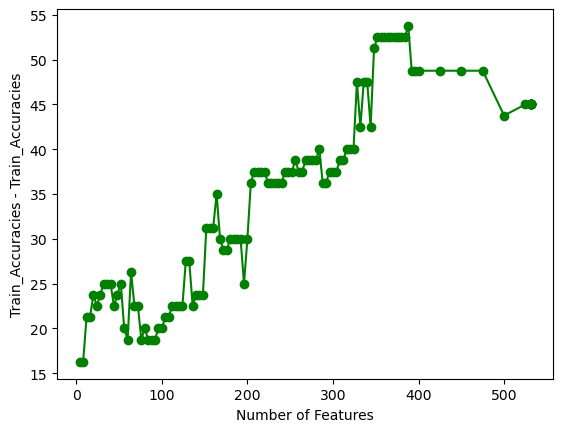

In [101]:
plot_results2(df)